# 2.1. Khởi tạo dataframe

Đây là cách thường ít được áp dụng vì khi làm việc chúng ta thường đọc dữ liệu từ những file dữ liệu có sẵn được lưu dưới dạng `csv` hoặc `txt`. Nhưng đôi khi chúng ta cũng cần khởi tạo dataframe từ đầu chẳng hạn như bạn muốn lưu kết quả log file của chương trình vào một dataframe và save dưới dạng `csv` sau đó. Việc lưu trữ dưới dạng dataframe sẽ giúp cho bạn dễ dàng thực hiện các phép lọc, thống kê và visualize trực tiếp từ dataframe một cách dễ dàng hơn. 

Đưới đây mình sẽ giới thiệu hai cách khởi tạo dataframe chính trực tiếp từ câu lệnh `pd.DataFrame(.)`.

## 2.1.1. Khởi tạo thông qua dictionary

Về định dạng dictionary chúng ta đã được học ở [chương phụ lục - dictionary](https://phamdinhkhanh.github.io/deepai-book/ch_appendix/appendix_dtypes_basic.html#dictionary). Nội dung của dictionary sẽ gồm key là tên cột và value là list giá trị của cột tương ứng.

In [1]:
import pandas as pd
from IPython.display import display
pd.set_option('max_colwidth', 40)
pd.set_option('precision', 5)
pd.set_option('max_rows', 10)
pd.set_option('max_columns', 30)


dict_columns = {
    'contents':['Author', 'Book', 'Target', 'No_Donation'],
    'infos':['Pham Dinh Khanh', 'ML algorithms to Practice', 'Vi mot cong dong AI vung manh hon', 'Community'],
    'numbers':[1993, 2021, 1, 2]
}

df = pd.DataFrame(dict_columns)
display(df)

,contents,infos,numbers
0,Author,Pham Dinh Khanh,1993
1,Book,ML algorithms to Practice,2021
2,Target,Vi mot cong dong AI vung manh hon,1
3,No_Donation,Community,2


Hàm display của `IPython` giúp cho DataFrame hiển thị được trên code khi run dưới dạng script file. các options của `pd.set_option()` lần lượt có tác dụng:

* `max_colwidth`: Qui định chiều rộng tối đa của một cột.
* `precision`: Độ chính xác của các sau dấu phảy của các cột định dạng float.
* `max_columns`, `max_rows`: Lần lượt là độ số lượng cột và số lượng dòng tối đa được hiển thị.

Tiếp theo chúng ta sẽ khởi tạo thông qua list các dòng.

## 2.1.2. Khởi tạo thông qua list các dòng

Theo cách này chúng ta sẽ truyền vào data là một list gồm các tupple mà mỗi tupple là một dòng dữ liệu. đối số `columns` sẽ qui định tên cột theo đúng thứ tự được qui định ở mỗi dòng.

In [2]:
import pandas as pd

records = [('Author', 'Pham Dinh Khanh', 1993), 
           ('Book', 'ML algorithms to Practice', 2021), 
           ('Target', 'Vi mot cong dong AI vung manh hon', 1), 
           ('No_Donation', 'Community', 2)]
           
# Khởi tạo DataFrame
df = pd.DataFrame(data = records, columns = ['contents', 'infos', 'numbers'])
df

,contents,infos,numbers
0,Author,Pham Dinh Khanh,1993
1,Book,ML algorithms to Practice,2021
2,Target,Vi mot cong dong AI vung manh hon,1
3,No_Donation,Community,2


Để lưu trữ một dataframe dưới dạng một file `csv` chúng ta dùng hàm `.to_csv(.)` tham số truyền vào là đường link save file. Chẳng hạn bên dưới ta lưu dataframe vào một file "data.csv" cùng thư mục với file notebook.

In [3]:
df.to_csv("data.csv")

## 2.1.3. Đọc dữ liệu từ file

Chúng ta cũng có thể khởi tạo bảng bằng cách đọc file `csv, txt, xls, xlsx, dat` thông qua hàm `pd.read_csv(.)`. Hàm này không chỉ đọc được những file có trên máy tính của bạn mà còn có thể download những file có trên mạng. Bên dưới chúng ta thực hành đọc dữ liệu về giá nhà ở tại Boston từ bộ dữ liệu `BostonHousing`. Bộ dữ liệu này gồm các trường:


* crim: Tỷ lệ phạm tội phạm bình quân đầu người theo thị trấn.
* zn: Tỷ lệ đất ở được quy hoạch cho các lô trên 25.000 foot square.
* indus: Tỷ lệ diện tích thuộc lĩnh vực _kinh doanh phi bán lẻ_ trên mỗi thị trấn.
* chas: Biến giả, = 1 nếu được bao bởi sông Charles River, = 0 nếu ngược lại.
* nox: Nồng độ khí Ni-tơ oxit.
* rm: Trung bình số phòng trên một căn hộ.
* age: Tỷ lệ căn hộ được xây dựng trước năm 1940.
* dis: Khoảng cách trung bình có trọng số tới 5 trung tâm việc làm lớn nhất ở Boston.
* rad: Chỉ số về khả năng tiếp cận đường cao tốc.
* tax: Giá trị thuế suất tính trên đơn vị `10000$`.
* ptratio: Tỷ lệ học sinh-giáo viên trên mỗi thị trấn.
* black: Tỷ lệ số người da đen trong thị trấn được tính theo công thức:
$1000(\text{Bk} - 0.63)^2$ ở đây $\text{Bk}$ là tỷ lệ người da đen trong thị trấn.
* lstat: Tỷ lệ phần trăm dân số thu nhập thấp.
* medv: median giá trị của nhà có người sở hữu tính trên đơn vị `1000$`.

In [4]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/phamdinhkhanh/datasets/master/BostonHousing.csv", sep=",", header = 0, index_col = None)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Trong hàm `pd.read_csv()` chúng ta sẽ khai báo các thông số chính bao gồm :

* sep: Là viết tắt của seperator, ký hiệu ngăn cách các trường trong cùng một dòng, thường và mặc định là dấu phảy.
* header: Mặc định là indice của dòng được chọn làm column name. Thường là dòng đầu tiên của file. Trường hợp file không có header thì để `header = None`. Khi đó indices cho column name sẽ được mặc định là các số tự nhiên liên tiếp từ 0 cho đến indice column cuối cùng.
* index_col: Là indice của column được sử dụng làm giá trị index cho dataframe. cột index phải có giá trị khác nhau để phân biệt giữa các dòng và khi chúng ta để index_col = None thì giá trị index sẽ được đánh mặc định từ 0 cho đến dòng cuối cùng.

Hàm `df.head()` mặc định sẽ hiển thị ra 5 quan sát đầu tiên của dataframe. Chúng ta muốn hiển thị 5 quan sát cuối cùng thì dùng hàm `df.tail()` và 5 quan sát ngẫu nhiên thì dùng hàm `df.sample(5)`.

Hàm `df.info()` sẽ cho ta biết định dạng và số lượng quan sát `not-null` của mỗi trường trong dataframe.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Hoặc chúng ta có thể dùng hàm `df.dtypes` để kiểm tra định dạng dữ liệu các trường của một bảng.

In [6]:
# Check for datatype
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
            ...   
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
Length: 14, dtype: object

Nếu muốn kiểm tra chi tiết hơn những thống kê mô tả của dataframe như trung bình, phương sai, min, max, median của một trường dữ liệu chúng ta dùng hàm `df.describe()`

In [7]:
# Thống kê mô tả dữ liệu
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000
mean,3.61352,11.36364,11.13678,0.06917,0.55470,6.28463,68.57490,3.79504,9.54941,408.23715,18.45553,356.67403,12.65306,22.53281
std,8.60155,23.32245,6.86035,0.25399,0.11588,0.70262,28.14886,2.10571,8.70726,168.53712,2.16495,91.29486,7.14106,9.19710
min,0.00632,0.00000,0.46000,0.00000,0.38500,3.56100,2.90000,1.12960,1.00000,187.00000,12.60000,0.32000,1.73000,5.00000
25%,0.08204,0.00000,5.19000,0.00000,0.44900,5.88550,45.02500,2.10018,4.00000,279.00000,17.40000,375.37750,6.95000,17.02500
50%,0.25651,0.00000,9.69000,0.00000,0.53800,6.20850,77.50000,3.20745,5.00000,330.00000,19.05000,391.44000,11.36000,21.20000
75%,3.67708,12.50000,18.10000,0.00000,0.62400,6.62350,94.07500,5.18843,24.00000,666.00000,20.20000,396.22500,16.95500,25.00000
max,88.97620,100.00000,27.74000,1.00000,0.87100,8.78000,100.00000,12.12650,24.00000,711.00000,22.00000,396.90000,37.97000,50.00000


## 2.1.4. Export to CSV, EXCEL, TXT, JSON

Đây là câu lệnh được sử dụng khá phổ biến để lưu trữ các file dữ liệu từ dataframe sang những định dạng khác nhau. Những định dạng này sẽ cho phép chúng ta load lại dữ liệu bằng các hàm `read_csv(), read_xlsx(), read_txt(), read_json()` sau đó.

In [8]:
%%script echo skipping

# Lưu dữ liệu sang file csv
df.to_csv('BostonHousing.csv', index = False)
# Lưu file excel
df.to_excel('BostonHousing.xls', index = False)
# Lưu dữ file json
df.to_json('BostonHousing.json') #do not include index = False, index only use for table orient

skipping


# 2.2. Thao tác với dataframe

## 2.2.1. Truy cập dataframe

Chúng ta có thể truy cập dataframe theo hai cách.

**Truy cập theo slice index:** Theo cách này chúng ta chỉ cần truyền vào index của dòng và cột và sử dụng hàm `df.iloc[rows_slice, columns_slice]` để trích xuất ra các dòng và cột tương ứng. Cách lấy slice cho rows và columns hoàn toàn tương tự như truy cập slice index trong [list](https://phamdinhkhanh.github.io/deepai-book/ch_appendix/appendix_dtypes_basic.html#list). 

_Note:_ `iloc` là viết tắt của indice location, tức là truy cập quan indice.

In [9]:
# Lựa chọn 5 dòng đầu và 5 cột đầu của df
df.iloc[:5, :5]

,crim,zn,indus,chas,nox
0,0.00632,18.0,2.31,0,0.538
1,0.02731,0.0,7.07,0,0.469
2,0.02729,0.0,7.07,0,0.469
3,0.03237,0.0,2.18,0,0.458
4,0.06905,0.0,2.18,0,0.458


In [10]:
# Lựa chọn 5 dòng từ 5:10 và 2 cột từ 2:4
df.iloc[5:10, 2:4]

,indus,chas
5,2.18,0
6,7.87,0
7,7.87,0
8,7.87,0
9,7.87,0


In [11]:
# Lựa chọn 5 dòng cuối và các cột 1 và 3
df.iloc[-5:, [1, 3]]

,zn,chas
501,0.0,0
502,0.0,0
503,0.0,0
504,0.0,0
505,0.0,0


Ngoài ra ta cũng có thể truy cập các dòng theo row index của dataframe thông qua câu lệnh `df.loc[]`.

In [12]:
# Truy cập các dòng có index là 10:15
df.loc[10:15]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
12,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
14,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9


**Truy cập theo column names:** Đây là cách được sử dụng phổ biến vì nó tường minh hơn. Theo cách này chúng ta sẽ truy cập các trường của dataframe bằng cách khai báo list column_names của chúng.

Ví dụ bên dưới chúng ta cần lấy ra các trường `['crim', 'tax', 'rad']` từ bảng `df`. Ta sẽ làm như sau:

In [13]:
df[['crim', 'tax', 'rad']].head()

,crim,tax,rad
0,0.00632,296,1
1,0.02731,242,2
2,0.02729,242,2
3,0.03237,222,3
4,0.06905,222,3


**Kết hợp cả hai cách**: Chúng ta có thể truy cập dataframe bằng cách kết hợp cả hai cách theo hướng sử dụng column names đối với cột và slice index đối với dòng:

In [14]:
# Lấy ra các dòng từ 10:15 của các trường 'crim', 'tax', 'rad'
df[['crim', 'tax', 'rad']].iloc[10:15]

,crim,tax,rad
10,0.22489,311,5
11,0.11747,311,5
12,0.09378,311,5
13,0.62976,307,4
14,0.63796,307,4


## 2.2.2. Lọc dataframe

Chúng ta có thể lọc dataframe thông qua các điều kiện đối với các trường. Điều kiện của trường được thể hiện như một biểu thức logic và bao trong dấu `[]`. Giả sử chúng ta muốn lọc ra các thị trấn mà có số phòng ở trung bình trên căn hộ là trên 4 thì truyền vào dấu `[]` điều kiện `df['rm'] > 4`.

In [15]:
df[df['rm'] > 4].head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Nếu chúng ta muốn kết hợp nhiều điều kiện thì dùng biểu thức logic `and` hoặc `or`. Ví dụ: Muốn lọc thêm điều kiện thuế suất trên 250 ngoài điều kiện số phòng thì ta làm như sau:

In [16]:
df[(df['rm']>4) & (df['tax']>250)].head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


**Muốn lọc các cột theo định dạng dữ liệu thì như thế nào?**

Ta dùng hàm `df.select_dtypes()` để lọc các cột theo định dạng dữ liệu. Những định dạng chính bao gồm `integer, float, object, boolean`. Ví dụ: Bên dưới chúng ta lọc các trường có định dạng dữ liệu là `float`.

In [17]:
df.select_dtypes('float').head()

,crim,zn,indus,nox,rm,age,dis,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,18.7,396.90,5.33,36.2


**Lọc các cột theo pattern của tên cột**

Khi làm việc với dữ liệu lớn sẽ có những tình huống mà bạn bắt gặp các cột thuộc về cùng một nhóm và chúng có chung một pattern. Chẳng hạn như về age sẽ có `age_1, age_2, age_3`,.... Làm thế nào để bạn lọc ra được những biến này từ dữ liệu? Chúng ta sẽ dùng hàm filter. Đây là hàm cực kỳ tiện ích khi lọc cột từ những bộ dữ liệu lớn mà bạn sẽ thường xuyên sử dụng sau này.

In [18]:
df2 = pd.DataFrame({
    'name':['a', 'b', 'c', 'd', 'e'],
    'age_1':[1, 2, 3, 4, 5],
    'age_2':[3, 5, 7, 9 , 10],
    'age_3':[2, 5, 2, 5, 6]
})

df2.head()

,name,age_1,age_2,age_3
0,a,1,3,2
1,b,2,5,5
2,c,3,7,2
3,d,4,9,5
4,e,5,10,6


Lựa chọn các cột bắt đầu là `age` thông qua hàm filter.

In [19]:
df2.filter(regex='^age', axis=1)

,age_1,age_2,age_3
0,1,3,2
1,2,5,5
2,3,7,2
3,4,9,5
4,5,10,6


Trong pandas thì `axis=1` là làm việc với cột và `axis=0` là làm việc với dòng. Giá trị của `regex=^age` có nghĩa là lọc các cột có chuỗi ký tự là `age` đứng đầu.

## 2.2.3. Sort dữ liệu

Trong nhiều trường hợp bạn sẽ cần sort dữ liệu theo chiều từ thấp lên cao hoặc từ cao xuống thấp để biết đâu là những quan sát nhỏ nhất và lớn nhất cũng như việc tạo ra một đồ thị có trend rõ ràng và thể hiện quan hệ tuyến tính giữa các biến theo trend.

Để sort dữ liệu chúng ta sử dụng hàm `df.sort_values(.)`. Lựa chọn là `ascending = True` giúp sort theo thứ tự tăng dần, trường hợp `False` sẽ giảm dần.

Giả sử bên dưới chúng ta cùng sort giá trị của căn nhà theo chiều giảm dần.

In [20]:
#Sort data
df.sort_values('medv', ascending = False).head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
283,0.01501,90.0,1.21,1,0.401,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50.0
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
369,5.66998,0.0,18.10,1,0.631,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.10,1,0.631,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0


chúng ta cũng có thể sort theo một nhóm các trường. Ví dụ để sort đồng thời giá trị của căn nhà và giá trị thuế suất thì ta truyền vào list các trường cần sort là `['medv', 'tax']`.

In [21]:
df.sort_values(['medv', 'tax'], ascending = False).head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
368,4.89822,0.0,18.1,0,0.631,4.970,100.0,1.3325,24,666,20.2,375.52,3.26,50.0
369,5.66998,0.0,18.1,1,0.631,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.1,1,0.631,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.1,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.1,1,0.668,5.875,89.6,1.1296,24,666,20.2,347.88,8.88,50.0


## 2.2.4. Các hàm đối với một trường

### 2.2.4.1. Min, max, mean, meadian, sum

Trên một trường dữ liệu của dataframe đã tích hợp sẵn các hàm tính toán như `min, max, mean, median, sum` để tính các giá trị đặc trưng cho từng trường.

In [22]:
# min, max, mean, median, sum
print(df['tax'].min(), df['tax'].max(), df['tax'].mean(), df['tax'].median(), df['tax'].sum())

187 711 408.2371541501976 330.0 206568


### 2.2.4.2. Hàm cut

Hàm cut giúp ta phân chia giá trị của một trường liên tục vào những khoảng theo ngưỡng cắt. Kết quả trả ra là nhãn của từng khoảng mà chúng ta khai báo.

In [23]:
bins = [-999999, 250, 400, 999999]
labels = ['low', 'normal', 'high']
# low: -999999 <- 250
# normal: 250 <- 400
# high: 400 <- 999999
df['tax_labels'] = pd.cut(df['tax'], bins=bins, labels=labels)
df[df['tax_labels']=='high'].head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,tax_labels
54,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9,high
111,0.10084,0.0,10.01,0,0.547,6.715,81.6,2.6775,6,432,17.8,395.59,10.16,22.8,high
112,0.12329,0.0,10.01,0,0.547,5.913,92.9,2.3534,6,432,17.8,394.95,16.21,18.8,high
113,0.22212,0.0,10.01,0,0.547,6.092,95.4,2.5480,6,432,17.8,396.90,17.09,18.7,high
114,0.14231,0.0,10.01,0,0.547,6.254,84.2,2.2565,6,432,17.8,388.74,10.45,18.5,high


### 2.2.4.3. Hàm qcut

Trong trường hợp chúng ta không muốn chia các bin dựa vào ngưỡng mà chỉ muốn khai báo số lượng bins và để cho hàm số tự quyết định ngưỡng để chia đều các quan sát vào các bins thì sử dụng hàm `pd.qcut(.)` (qcut là viết tắt của quantile cut). Bên dưới ta sẽ chia thành 3 bins (số bins sẽ được khai báo trong `q=3`) với labels tương ứng là `['low', 'normal', 'high']`

In [24]:
import numpy as np

labels = ['low', 'normal', 'high']
tax_labels = pd.qcut(df['tax'], q=3, labels=labels)
np.unique(tax_labels, return_counts = True)

(array(['high', 'low', 'normal'], dtype=object), array([168, 172, 166]))

Trường hợp muốn xác định tỷ lệ phần trăm **luỹ kế** của các ngưỡng phân chia ta có thể khai báo q là list gồm các ngưỡng luỹ kế. Ví dụ bên dưới ta muốn chia làm ba khoảng giá trị, mỗi khoảng chiếm 33% thì ta khai báo ngưỡng luỹ kế `q = [0, 0.33, 0.66, 1]`

### 2.2.4.4. Apply

Apply sẽ giúp ta biến đổi giá trị của một trường theo một hàm số xác định trước. Hàm số biến đổi được áp dụng trong apply sẽ là một hàm `lamda`. Hàm lambda là một khái niệm rất quan trọng trong python, hàm số này có cú pháp dạng `lambda x: formula`.

Phân tích kỹ hơn thì chúng ta thấy nó không có return. Điều này là phù hợp với ý nghĩa của hàm lambda vì nó không yêu cầu gía trị trả về ngay. Thực tế nó giống như một lời hứa sẽ thực hiện hàm đó tại thời điểm áp dụng một cách ngầm định bên trong một hàm khác (ở đây là hàm apply).

Ví dụ bên dưới ta muốn nhân đôi giá trị của tax thì có thể sử dụng hàm apply với lambda như sau:

In [25]:
df['tax'].apply(lambda x: 2*x).head()

0    592
1    484
2    484
3    444
4    444
Name: tax, dtype: int64

Ta cũng có thể áp dụng cho nhiều trường một lúc. Khi đó cần khai báo `axis=1` để biết rằng ta đang áp dụng trên từng cột, nếu axis=0 thì sẽ áp dụng trên từng dòng.

In [26]:
df[['tax', 'medv']].apply(lambda x: 2*x, axis=1).head()

,tax,medv
0,592.0,48.0
1,484.0,43.2
2,484.0,69.4
3,444.0,66.8
4,444.0,72.4


### 2.2.4.5. Map

Map là hàm giúp biến đổi giá trị của một biến sang giá trị mới dựa trên dictionary mà chúng ta áp dụng. Giá trị cũ sẽ là key và giá trị mới sẽ là value.

Bên dưới ta sẽ map các giá trị của trường `df['tax_labels']` sang các giá trị tiếng Việt.

In [27]:
dict_tax = {
      'low':'thap',
      'normal':'tb',        
      'high':'cao'
    }
    
df['tax_labels'].map(dict_tax).head()

0      tb
1    thap
2    thap
3    thap
4    thap
Name: tax_labels, dtype: category
Categories (3, object): ['thap' < 'tb' < 'cao']

## 2.2.5. Biểu đồ matplotlib trên pandas

Chúng ta có thể nói rằng pandas rất mạnh vì nó đã wrap dường như toàn bộ các đồ thị cơ bản của matplotlib vào bên trong các hàm thành phần của pandas column. Do đó việc visualize trở nên vô cùng ngắn gọn, thậm chí là chỉ trên một dòng.

Bên dưới chúng ta sẽ cùng lướt qua nhanh các đồ thị cơ bản khi visualize trên `pd.column`. Biến được áp dụng đồng nhất cho các đồ thị là `tax`.

**1. biểu đồ line**

<AxesSubplot:>

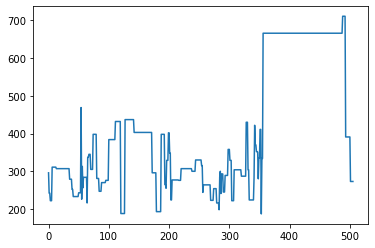

In [28]:
df['tax'].plot()

**2. Biểu đồ line kết hợp với point**

<AxesSubplot:>

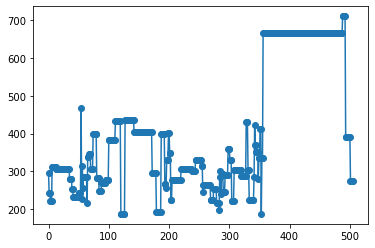

In [29]:
df['tax'].plot(marker='o')

**3. Biểu đồ barchart**

Biều đồ này được dùng phù hợp khi chúng ta muốn so sánh chênh lệch giữa các nhóm về mặt giá trị tuyệt đối.

<AxesSubplot:xlabel='tax_labels'>

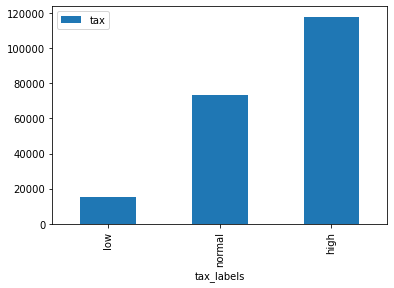

In [30]:
df_summary = df[['tax_labels', 'tax']].groupby('tax_labels').sum()
df_summary.plot.bar()

Ở đây ta sẽ phải dùng thêm hàm groupby để tạo thành bảng thống kê tổng thuế theo `tax_labels` rồi mới vẽ biểu đồ. Khi quen thuộc bạn có thể viết gọn hai câu lệnh lại thành một line như sau:

<AxesSubplot:xlabel='tax_labels'>

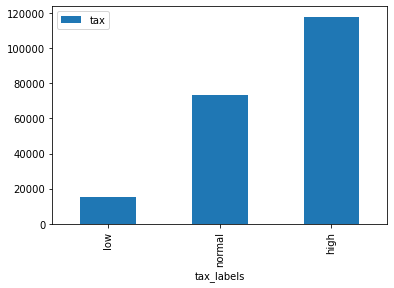

In [31]:
df[['tax_labels', 'tax']].groupby('tax_labels').sum().plot.bar()

**4. Biểu đồ pie**

Đây là biểu đồ dùng để thể hiện giá trị phần trăm. Phù hợp khi so sánh giá trị tương đối giữa các nhóm.

<AxesSubplot:ylabel='tax'>

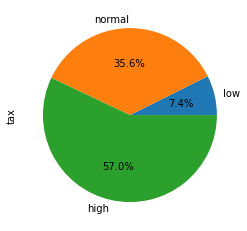

In [32]:
df_summary['tax'].plot.pie(autopct = '%1.1f%%')

**5. Biểu đồ boxplot**

Biểu đồ boxplot sẽ được sử dụng để quan sát phân phối của biến đối với các giá trị min, max và các ngưỡng phân vị 25%, 50%, 75%. Căn cứ vào boxplot ta có thể biết được khoảng biến thiên của biến rộng hay hẹp, biến phân phối lệch trái hay phải.

<AxesSubplot:>

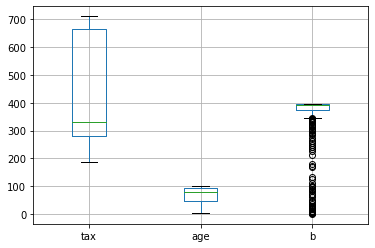

In [33]:
df[['tax', 'age', 'b']].boxplot()

**6. Biểu đồ area**

Biểu đồ area cho ta biết diện tích nằm dưới đường biểu diễn và trên trục hoành.

<AxesSubplot:xlabel='tax_labels'>

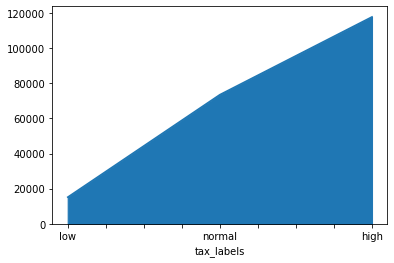

In [34]:
df_summary['tax'].plot.area()

# 2.3. Reshape dataframe trên pandas

## 2.3.1. Melt

Hàm melt là hàm được lấy ý tưởng từ ngôn ngữ R. Hàm này sẽ làm cho bảng của chúng ta trở nên bớt cồng kềnh hơn bằng cách rút gọn nhiều measurements thành hai cột variable và value trong đó cột variable qui định loại measurement và value là giá trị của measurement. Bảng của bạn sẽ có ít cột hơn đáng kể nên trông giống như các cột measurement đang bị tan chảy vậy. Do đó nó có tên gọi là melt.

Bạn sẽ dễ hình dung hơn những gì mình nói thông qua ví dụ bên dưới. Giả sử bảng của mình gồm Ho, Ten là các dimensions và `ChieuCao, CanNang, Tuoi, Diem` là những measurements.

In [35]:
df5 = pd.DataFrame({
  'Ho':['Pham','Nguyen'],
  'Ten' :['Cong', 'Dong'],
  'ChieuCao':[170, 175],
  'CanNang':[60, 65],
  'Tuoi': [25, 27],
  'Diem': [8.5, 9.0],
})

df5

,Ho,Ten,ChieuCao,CanNang,Tuoi,Diem
0,Pham,Cong,170,60,25,8.5
1,Nguyen,Dong,175,65,27,9.0


Ta nhận thấy `Ho, Ten` là những dimension, bây giờ ta sẽ giữ nguyên những trường này và làm tan chảy các cột.

In [36]:
df5.melt(['Ho', 'Ten'])

,Ho,Ten,variable,value
0,Pham,Cong,ChieuCao,170.0
1,Nguyen,Dong,ChieuCao,175.0
2,Pham,Cong,CanNang,60.0
3,Nguyen,Dong,CanNang,65.0
4,Pham,Cong,Tuoi,25.0
5,Nguyen,Dong,Tuoi,27.0
6,Pham,Cong,Diem,8.5
7,Nguyen,Dong,Diem,9.0


Ta nhận thấy bảng đã trở nên gọn gàng hơn khi các cột được đưa vào trường `variable` và giá trị của chúng được đưa vào `value`.

Cách biến đổi `melt` sẽ phù hợp với các bảng đã phân chia sẵn dimension, measurement rõ ràng và số lượng measurements của bảng là lớn.

## 2.3.2. Biến đổi Dummy

Cách biến đổi dummy là một cách rất hiệu quả để biến đổi một biến category thành một one-hot véc tơ. Cụ thể cũng với bảng `df5` ở trên, ta nhận thấy biến `Ho` gồm hai giá trị là `Pham` và `Nguyen`. Chúng ta có thể tạo thành một one-hot vector sao cho nếu giá trị đầu tiên là 1 thì tương ứng với họ `Pham` và giá trị thứ hai là 1 thì họ `Nguyen` (chưa xét tới trường hợp tồn tại họ khác `Pham` và `Nguyen`). Thường thì bạn sẽ nghĩ đến sử dụng hàm [LabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html) của sklearn nhưng pandas cung cấp cho bạn một hàm đơn giản hơn để thực hiện việc này. Đó là `pd.get_dummies()`

In [37]:
pd.get_dummies(df5)

,ChieuCao,CanNang,Tuoi,Diem,Ho_Nguyen,Ho_Pham,Ten_Cong,Ten_Dong
0,170,60,25,8.5,0,1,1,0
1,175,65,27,9.0,1,0,0,1


Ta thấy hàm này sẽ tìm **toàn bộ** các biến là category (có định dạng trường là `object`) và tự động trải phẳng chúng. Khi đó các cột mới được tạo thành chính là `Ho_Nguyen`, `Ho_Pham` là những nhãn thuộc biến `Ho`. Giá trị của những trường này bằng 0 hoặc 1.

Mặc dù có cú pháp cực kì đơn giản nhưng hàm `pd.get_dummies()` lại cực kì hữu ích đối với data scientist khi xây dựng mô hình mà bạn cần ghi nhớ.

# 2.4. Thống kê theo nhóm trên pandas

Khi làm việc với dữ liệu bảng chúng ta thường xuyên phải thống kê dữ liệu theo các nhóm để bắt dữ liệu tạo ra những thông tin insight hữu ích cho phân tích và ra quyết định. Ngoài ra những feature tốt, có sức mạnh phân loại và dự báo cao có thể được tạo thành từ việc thống kê dữ liệu theo nhóm. Quá trình thống kê và phân tích dữ liệu mặc dù tốn kém về mặt thời gian nhưng lại rất quan trọng đối với mô hình. Vì vậy chúng ta cần thực hiện chúng kỹ lưỡng và cần kết hợp giữa kỹ năng thống kê và kinh nghiệm thực tiễn.

Ở mục 5 này chúng ta sẽ làm quen với hai câu lệnh kinh điển trong pandas được sử dụng nhiều trong thống kê theo nhóm trên pandas đó là `df.groupby()` và `pd.pivotable()`.

## 2.4.1. df.groupby()

groupby là câu lệnh cho phép bạn áp dụng những hàm số trên measurements dựa trên việc phân nhóm dữ liệu theo các dimensions.

Nếu bạn chưa hiểu về khái niệm measurement và dimension thì mình có thể giải thích đơn giản là: measurement là những biến có thể cộng trừ nhân chia và đo đếm được còn dimension là những biến dùng để phân nhóm dữ liệu. Ví dụ chiều cao là một measurement có thể đo theo dimension là giới tính gồm các nhóm nam/nữ.

Cú pháp của hàm `df.groupby()` khá đơn giản:

```
df.groupby(by=None, 
  ...
)
```

Chúng ta cần xác định các chiều dimension trong `by`. Phía sau `groupby()` là một list các measurements mà ta cần áp dụng hàm lên trên những trường này.

In [38]:
df.groupby('tax_labels')['tax'].sum()

tax_labels
low        15221
normal     73540
high      117807
Name: tax, dtype: int64

Theo cách trên thì ta chỉ áp dụng được với những hàm tính toán như `sum, avg, min, max` có sẵn trong dataframe. Nếu muốn sử dụng `groupby()` cho mọi biến đổi hàm chúng ta có thể dùng hàm `lambda` trong `apply()`.

In [39]:
df.groupby('tax_labels')['tax'].apply(lambda x: sum(x))

tax_labels
low        15221
normal     73540
high      117807
Name: tax, dtype: int64

Nếu muốn áp dụng tính toán cho nhiều measurements một lúc thì truyền vào một list các measurements. Chẳng hạn bên dưới ta truyền vào một list gồm `['tax', 'rm']`

In [40]:
import numpy as np
df.groupby('tax_labels')[['tax', 'rm']].apply(lambda x: np.mean(x))

,tax,rm
tax_labels,,
low,220.59420,6.52564
normal,310.29536,6.42074
high,589.03500,6.04020


Chúng ta cũng có thể tự định nghĩa các hàm được tuỳ biến theo ý muốn:

In [41]:
# Tính quantile 90% của mỗi nhóm tax_labels.
def quantile(x):
  q_90 = np.quantile(x, 0.9)
  return q_90

df.groupby('tax_labels')['tax'].apply(lambda x: quantile(x))

tax_labels
low       244.2
normal    384.0
high      666.0
Name: tax, dtype: float64

Hoặc group theo nhiều chiều dữ liệu. Khi đó phải truyền vào `groupby()` một list các dimension.

In [42]:
df.groupby(['tax_labels', 'chas'])['tax'].apply(lambda x: quantile(x))

tax_labels  chas
low         0       244.6
            1       223.0
normal      0       384.0
            1       307.0
high        0       666.0
            1       666.0
Name: tax, dtype: float64

Ưu điểm của `groupby()` đó là nhanh gọn, dễ hiểu. Nhưng nhược điểm của `groupby()` đó là chúng ta chỉ có thể áp dụng cùng một biến đổi hàm số cho mọi measurements. Ở `pivot_table` bạn có thể tuỳ biến sâu hơn từng hàm đối với từng measurement nhưng cú pháp sẽ phức tạp hơn một chút.

## 2.4.2. Pivotable

Pivot table là một công thức có ứng dụng rất quan trọng trong pandas. Nó giúp cho chúng ta thực hiện các thống kê trên các biến measurement theo các chiều dimension. 

Bạn sẽ hình dung ra cách áp dụng của `pivot_table()` thông qua ví dụ bên dưới.

In [43]:
import numpy as np

pd.pivot_table(df, 
               columns = ['tax_labels', 'chas'], 
               index = ['rad'], 
               values = 'tax',
               aggfunc = np.sum)

tax_labels     low          normal             high        
chas             0      1        0       1        0       1
rad                                                        
1            241.0  198.0   4968.0     NaN    422.0     NaN
2           1800.0    NaN   4456.0     NaN      NaN     NaN
3           6424.0  446.0   1208.0     NaN   1273.0     NaN
4           2155.0    NaN  20434.0  2147.0  12222.0     NaN
5           2853.0  216.0  22175.0   828.0   9269.0  2821.0
6              NaN    NaN   5807.0     NaN   3888.0     NaN
7            888.0    NaN   4287.0     NaN      NaN     NaN
8              NaN    NaN   5695.0  1535.0      NaN     NaN
24             NaN    NaN      NaN     NaN  82584.0  5328.0

Bạn hình dung ra nội dung của bảng thống kê trên chứ?

Bảng thống kê trên sẽ tính tổng số thuế thu được phân theo các cột là `tax_labels` và `chas` (tax_labels gồm low, normal và high và chas gồm 0-không bao bởi sông, 1-bao bởi sông).

Các dòng lại được phân nhóm theo chỉ số mức độ tiếp cận đường cao tốc `rad` gồm các giá trị `1,2,3,4,5,6,7,8,24`.

Như vậy ta có thể hình dung được trong công thức của pivot_table, các đối số của nó có ý nghĩa như sau:

* `columns`: List các dimensions của cột mà chúng ta cần thống kê.
* `index`: List các dimensions theo dòng mà chúng ta cần thống kê.
* `values`: List các measurement chúng ta sử dụng để tính toán.
* `aggfunc`: Qui định hàm số chúng ta sẽ dùng để biến đổi measurement. Trong ví dụ này chúng ta áp dụng hàm np.sum cho toán bộ các measurement.

**Làm sao để qui định mỗi measurement một công thức?**

Giả sử chúng ta cần tính thêm trung bình số phòng trên căn hộ. Tức là thêm trung bình của trường `rm` trong khi vẫn cần tính tổng của trường `tax`. Khi đó cần khai báo `aggfunc` dưới dạng một dictionary có key là tên của measurement và value là công thức của measurement.

In [44]:
pd.pivot_table(df, 
               columns = ['tax_labels', 'chas'], 
               index = ['rad'], 
               values = ['tax', 'rm'],
               aggfunc = {
                   'tax': np.sum,
                   'rm': np.mean
                   })

rm                                                 tax  \
tax_labels      low           normal              high              low   
chas              0       1        0        1        0        1       0   
rad                                                                       
1           6.23000  7.9230  6.49553      NaN  6.54000      NaN   241.0   
2           6.08611     NaN  6.98827      NaN      NaN      NaN  1800.0   
3           6.44259  6.8055  6.38275      NaN  6.66600      NaN  6424.0   
4           6.79033     NaN  6.10201  6.17875  5.96652      NaN  2155.0   
5           6.46277  7.6450  6.50922  6.07067  5.98217  6.44614  2853.0   
6               NaN     NaN  6.11888      NaN  6.07800      NaN     NaN   
7           7.03025     NaN  6.53008      NaN      NaN      NaN   888.0   
8               NaN     NaN  7.02463  6.67020      NaN      NaN     NaN   
24              NaN     NaN      NaN      NaN  5.98414  6.61137     NaN   

                                                     
tax_labels          normal             high          
chas            1        0       1        0       1  
rad                                                  
1           198.0   4968.0     NaN    422.0     NaN  
2             NaN   4456.0     NaN      NaN     NaN  
3           446.0   1208.0     NaN   1273.0     NaN  
4             NaN  20434.0  2147.0  12222.0     NaN  
5           216.0  22175.0   828.0   9269.0  2821.0  
6             NaN   5807.0     NaN   3888.0     NaN  
7             NaN   4287.0     NaN      NaN     NaN  
8             NaN   5695.0  1535.0      NaN     NaN  
24            NaN      NaN     NaN  82584.0  5328.0

Bảng của chúng ta đã tăng gấp đôi số cột. Dòng đầu tiên của bảng là `rm`, `tax` là những thông tin ứng với từng measurement.

Bạn thấy đó, `pd.pivot_table()` hoàn toàn đơn giản và rất hiệu quả phải không nào?

# 2.5. Join, Merge và Concatenate bảng

Những doanh nghiệp lớn thường tổ chức cơ sở dữ liệu dưới dạng những bảng dữ liệu có quan hệ. Những bảng này được liên kết với nhau bởi key dưới những quan hệ dữ liệu như one-to-one, many-to-one hoặc one-to-many. Những kiến trúc phổ biến trong data warehouse như `star schema` và `snowflake schema` sẽ giúp cho chúng ta nhanh chóng join các bảng lại với nhau để tạo ra những bảng raw data tổng hợp phục vụ cho các nhu cầu phân tích, thống kê và xây dựng mô hình.

Ngoài ngôn ngữ SQL là công cụ chính để làm việc với những hệ cơ sở dữ liệu có quan hệ, Data scientist cũng cần nắm vững những kỹ năng liên kết join, merge và concatenate bảng trên pandas mà thông qua chương này mình sẽ giới thiệu tới các bạn.

## 2.5.1. Các kiểu join

Chúng ta có 4 kiểu join chính là `left join, right join, inner join, full join` được thể hiện qua biểu đồ venn bên dưới:

![](https://www.dofactory.com/img/sql/sql-joins.png)

Chúng ta có hai bảng bên trái và bên phải với những phần thông tin chung (giao nhau giữa hai vòng tròn) và riêng. Phần diện tích màu xanh lá cây là Kết quả của phép join. Chúng ta có thể hình dung kết quả của phép join đó là:

* left join: Lấy bảng bên trái làm gốc và đưa thêm thông tin bảng bên phải nếu nó xuất hiện ở bảng bên trái.
* right join: Tương tự như left join nhưng bảng bên phải sẽ làm gốc.
* inner join: Lấy những thông tin mà xuất hiện **đồng thời** ở cả hai bảng.
* full join: Lấy những thông tin xuất hiện ở **một trong hai** bảng.

Bên dưới chúng ta cùng thực hành join.

In [45]:
import pandas as pd

df_sinhvien = pd.DataFrame({
    'ID':['001', '002', '003', '004', '005'],
    'Name':['Pham Van Nghia', 'Tong Thuy Linh', 'Le Van Dai', 'Tran Quang Nghia', 'Doan Thu Ha'],
    'Age': [25, 26, 25, 23, 22],
    'Province':['Nam Dinh', 'Thanh Hoa', 'TP Ho Chi Minh', 'Da Nang', 'Can Tho']  
})

df_sinhvien

,ID,Name,Age,Province
0,001,Pham Van Nghia,25,Nam Dinh
1,002,Tong Thuy Linh,26,Thanh Hoa
2,003,Le Van Dai,25,TP Ho Chi Minh
3,004,Tran Quang Nghia,23,Da Nang
4,005,Doan Thu Ha,22,Can Tho


In [46]:
df_score = pd.DataFrame({
    'ID': ['001', '002', '003', '006', '007'],
    'Math': [6.75, 9, 8, 7, 10],
    'Physic': [8, 9, 9, 8.5, 9],
    'Chemistry': [7, 9.5, 7.5, 9, 10],
    'Province': ['Nam Dinh', 'Thanh Hoa', 'TP Ho Chi Minh', 'Quang Nam', 'Nghe An']
})

df_score

,ID,Math,Physic,Chemistry,Province
0,001,6.75,8.0,7.0,Nam Dinh
1,002,9.00,9.0,9.5,Thanh Hoa
2,003,8.00,9.0,7.5,TP Ho Chi Minh
3,006,7.00,8.5,9.0,Quang Nam
4,007,10.00,9.0,10.0,Nghe An


## 2.5.2. Câu lệnh pd.merge()

Cú pháp chung của câu lện `pd.merge()` đó là:



```
pd.merge(
    left,
    right,
    how="inner",
    on=None,
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)
```

Trong đó một số trường quan trọng:

* left: bảng bên trái
* right: bảng bên phải
* how: Phương pháp join gồm `left, right, inner, outer`
* left_on: Trường ở bảng bên trái sử dụng để join
* right_on: Trường ở bảng bên phải sử dụng để join
* left_index: Mặc định là False. Nếu True, sử dụng row index ở bảng bên trái như là trường join.
* right_index: Mặc định là False. Nếu True, sử dụng row index ở bảng bên phải như là trường join.
* suffixes: Nếu hai bảng tồn tại các trường trùng nhau thì sử dụng suffix để phân biệt trường nào thuộc bảng nào. Mặc định là `('_x', '_y')`.

Tiếp theo áp dụng câu lệnh trên để merge bảng sinh viên với điểm theo key là ID sinh viên.

**inner join:** Theo cách này chỉ ID xuất hiện ở đồng thời hai bảng mới được lựa chọn.

In [47]:
pd.merge(df_sinhvien, df_score, 
         left_on='ID', 
         right_on='ID', 
         how='inner', 
         suffixes=['_Sv', '_Score'])

,ID,Name,Age,Province_Sv,Math,Physic,Chemistry,Province_Score
0,001,Pham Van Nghia,25,Nam Dinh,6.75,8.0,7.0,Nam Dinh
1,002,Tong Thuy Linh,26,Thanh Hoa,9.00,9.0,9.5,Thanh Hoa
2,003,Le Van Dai,25,TP Ho Chi Minh,8.00,9.0,7.5,TP Ho Chi Minh


**left join:** Những ID xuất hiện ở bảng bên trái sẽ được lựa chọn.

In [48]:
pd.merge(df_sinhvien, df_score, 
         left_on='ID', 
         right_on='ID', 
         how='left', 
         suffixes=['_Sv', '_Score'])

,ID,Name,Age,Province_Sv,Math,Physic,Chemistry,Province_Score
0,001,Pham Van Nghia,25,Nam Dinh,6.75,8.0,7.0,Nam Dinh
1,002,Tong Thuy Linh,26,Thanh Hoa,9.00,9.0,9.5,Thanh Hoa
2,003,Le Van Dai,25,TP Ho Chi Minh,8.00,9.0,7.5,TP Ho Chi Minh
3,004,Tran Quang Nghia,23,Da Nang,NaN,NaN,NaN,NaN
4,005,Doan Thu Ha,22,Can Tho,NaN,NaN,NaN,NaN


**right join:** Những ID xuất hiện ở bảng bên phải sẽ được lựa chọn.

In [49]:
pd.merge(df_sinhvien, df_score, 
         left_on='ID', 
         right_on='ID', 
         how='right', 
         suffixes=['_Sv', '_Score'])

,ID,Name,Age,Province_Sv,Math,Physic,Chemistry,Province_Score
0,001,Pham Van Nghia,25.0,Nam Dinh,6.75,8.0,7.0,Nam Dinh
1,002,Tong Thuy Linh,26.0,Thanh Hoa,9.00,9.0,9.5,Thanh Hoa
2,003,Le Van Dai,25.0,TP Ho Chi Minh,8.00,9.0,7.5,TP Ho Chi Minh
3,006,NaN,NaN,NaN,7.00,8.5,9.0,Quang Nam
4,007,NaN,NaN,NaN,10.00,9.0,10.0,Nghe An


**outer join:** Tất cả ID xuất hiện ở bảng bên trái hoặc bảng bên phải sẽ được lựa chọn.

In [50]:
pd.merge(df_sinhvien, df_score, 
         left_on='ID', 
         right_on='ID', 
         how='outer', 
         suffixes=['_Sv', '_Score'])

,ID,Name,Age,Province_Sv,Math,Physic,Chemistry,Province_Score
0,001,Pham Van Nghia,25.0,Nam Dinh,6.75,8.0,7.0,Nam Dinh
1,002,Tong Thuy Linh,26.0,Thanh Hoa,9.00,9.0,9.5,Thanh Hoa
2,003,Le Van Dai,25.0,TP Ho Chi Minh,8.00,9.0,7.5,TP Ho Chi Minh
3,004,Tran Quang Nghia,23.0,Da Nang,NaN,NaN,NaN,NaN
4,005,Doan Thu Ha,22.0,Can Tho,NaN,NaN,NaN,NaN
5,006,NaN,NaN,NaN,7.00,8.5,9.0,Quang Nam
6,007,NaN,NaN,NaN,10.00,9.0,10.0,Nghe An


## 2.5.3. df.join()

DataFrame có một hàm là hàm _join()_ có chức năng tương đương với merge, dùng để liên kết bảng theo các keys.

In [51]:
df_sinhvien.join(df_score, lsuffix='_Sv', rsuffix='_Score')

,ID_Sv,Name,Age,Province_Sv,ID_Score,Math,Physic,Chemistry,Province_Score
0,001,Pham Van Nghia,25,Nam Dinh,001,6.75,8.0,7.0,Nam Dinh
1,002,Tong Thuy Linh,26,Thanh Hoa,002,9.00,9.0,9.5,Thanh Hoa
2,003,Le Van Dai,25,TP Ho Chi Minh,003,8.00,9.0,7.5,TP Ho Chi Minh
3,004,Tran Quang Nghia,23,Da Nang,006,7.00,8.5,9.0,Quang Nam
4,005,Doan Thu Ha,22,Can Tho,007,10.00,9.0,10.0,Nghe An


Mặc định bảng sẽ join theo index của dòng, các đối số lsuffix` và `rsuffix`lần lượt được sử dụng để qui định hậu tố (_suffix_) cho bảng bên trái và bảng bên phải nếu xuất hiện trường trùng tên.

Nếu muốn thực hiện hàm `join()` theo một trường nào đó, chúng ta phải thiết lập index cho bảng là trường cần join rồi sau đó mới thực hiện join. Ví dụ bạn cần join theo ID:

In [52]:
# Thiết lập index
df_sinhvien.set_index('ID', inplace = True)
df_score.set_index('ID', inplace = True)

# Join bảng
df_sinhvien.join(df_score, lsuffix='_Sv', rsuffix='_Score')

,Name,Age,Province_Sv,Math,Physic,Chemistry,Province_Score
ID,,,,,,,
001,Pham Van Nghia,25,Nam Dinh,6.75,8.0,7.0,Nam Dinh
002,Tong Thuy Linh,26,Thanh Hoa,9.00,9.0,9.5,Thanh Hoa
003,Le Van Dai,25,TP Ho Chi Minh,8.00,9.0,7.5,TP Ho Chi Minh
004,Tran Quang Nghia,23,Da Nang,NaN,NaN,NaN,NaN
005,Doan Thu Ha,22,Can Tho,NaN,NaN,NaN,NaN


In [53]:
# reset lại index
df_sinhvien.reset_index('ID', inplace = True)
df_score.reset_index('ID', inplace = True)

## 2.5.4. Câu lệnh pd.concat()

Câu lệnh `pd.concat()` được sử dụng để nối hai bảng theo dòng hoặc theo cột. Đây là câu lệnh được sử dụng khá phổ biến để tạo bảng tổng hợp từ các bảng dữ liệu nhỏ. Một ví dụ khá cụ thể đó là trong package [vnquant](https://github.com/phamdinhkhanh/vnquant) dữ liệu mỗi mã chứng khoán sẽ bị phân trang. Nếu download lần lượt trừng trang thì sẽ lâu, do đó để tăng tốc thì chúng ta sẽ download song song nhiều trang một lúc và sử dụng lệnh `pd.concat()` để nối dữ liệu thành một bảng chính.

Cú pháp chung của lệnh `pd.concat()` sẽ như sau:

```
pd.concat(
  objs, 
  axis=0, 
  join='outer', 
  ignore_index=False, 
  keys=None, 
  levels=None, 
  names=None, 
  verify_integrity=False, 
  sort=False, 
  copy=True
)
```

Trong đó:

* objs: Là list các bảng cần concanate.
* axis: Mặc đinh là 0, nối theo dòng. Trái lại là 1 nếu nối theo cột.
* join: `inner` chỉ lấy các dòng hoặc cột có cùng index; `outer` lấy cả các dòng hoặc cột khác index.


**Nếu muốn nối theo dòng thì làm thế nào?**

Để nối hai bảng theo dòng thì ta sẽ để `axis=0`, đây là giá trị mặc định của đối số này trong `pd.concat()`.

Nếu chúng ta muốn nối hai bảng theo dòng và chỉ lấy trường thông tin mà cả hai bảng đều có thì cần thiết lập `join='inner'`.

In [54]:
pd.concat([df_sinhvien, df_score], 
          axis=0,
          join='inner')

,ID,Province
0,001,Nam Dinh
1,002,Thanh Hoa
2,003,TP Ho Chi Minh
3,004,Da Nang
4,005,Can Tho
0,001,Nam Dinh
1,002,Thanh Hoa
2,003,TP Ho Chi Minh
3,006,Quang Nam
4,007,Nghe An


Ta cũng có thể nối hai bảng theo dòng và lấy tất cả các trường thông tin ở cả hai bảng thì sẽ thiết lập `join='outer'`. Đây là giá trị mặc định của đối số này. Giá trị `NaN` tự động được fill đối với những thông tin không có.

In [55]:
pd.concat([df_sinhvien, df_score], 
          axis=0, 
          join='outer')

,ID,Name,Age,Province,Math,Physic,Chemistry
0,001,Pham Van Nghia,25.0,Nam Dinh,NaN,NaN,NaN
1,002,Tong Thuy Linh,26.0,Thanh Hoa,NaN,NaN,NaN
2,003,Le Van Dai,25.0,TP Ho Chi Minh,NaN,NaN,NaN
3,004,Tran Quang Nghia,23.0,Da Nang,NaN,NaN,NaN
4,005,Doan Thu Ha,22.0,Can Tho,NaN,NaN,NaN
0,001,NaN,NaN,Nam Dinh,6.75,8.0,7.0
1,002,NaN,NaN,Thanh Hoa,9.00,9.0,9.5
2,003,NaN,NaN,TP Ho Chi Minh,8.00,9.0,7.5
3,006,NaN,NaN,Quang Nam,7.00,8.5,9.0
4,007,NaN,NaN,Nghe An,10.00,9.0,10.0


**Làm sao để nối theo cột**

Để nối theo cột thì khai báo `axis=1`.

In [56]:
pd.concat([df_sinhvien, df_score], 
          axis=1)

,ID,Name,Age,Province,ID,Math,Physic,Chemistry,Province
0,001,Pham Van Nghia,25,Nam Dinh,001,6.75,8.0,7.0,Nam Dinh
1,002,Tong Thuy Linh,26,Thanh Hoa,002,9.00,9.0,9.5,Thanh Hoa
2,003,Le Van Dai,25,TP Ho Chi Minh,003,8.00,9.0,7.5,TP Ho Chi Minh
3,004,Tran Quang Nghia,23,Da Nang,006,7.00,8.5,9.0,Quang Nam
4,005,Doan Thu Ha,22,Can Tho,007,10.00,9.0,10.0,Nghe An


Khi đó các dòng sẽ được liên kết theo row index ở mỗi bảng. Nếu chúng ta muốn các dòng được liên kết theo một trường nào đó như 'ID' thì cần `set_index()` là trường đó trước khi nối.

In [57]:
pd.concat([df_sinhvien.set_index('ID'), df_score.set_index('ID')], 
          axis=1)

,Name,Age,Province,Math,Physic,Chemistry,Province
001,Pham Van Nghia,25.0,Nam Dinh,6.75,8.0,7.0,Nam Dinh
002,Tong Thuy Linh,26.0,Thanh Hoa,9.00,9.0,9.5,Thanh Hoa
003,Le Van Dai,25.0,TP Ho Chi Minh,8.00,9.0,7.5,TP Ho Chi Minh
004,Tran Quang Nghia,23.0,Da Nang,NaN,NaN,NaN,NaN
005,Doan Thu Ha,22.0,Can Tho,NaN,NaN,NaN,NaN
006,NaN,NaN,NaN,7.00,8.5,9.0,Quang Nam
007,NaN,NaN,NaN,10.00,9.0,10.0,Nghe An


Nếu ta chỉ muốn các dòng mà ID xuất hiện ở cả hai bảng thì thêm `join='inner'`.

In [58]:
pd.concat([df_sinhvien, df_score], 
          axis=1,
          join='inner')

,ID,Name,Age,Province,ID,Math,Physic,Chemistry,Province
0,001,Pham Van Nghia,25,Nam Dinh,001,6.75,8.0,7.0,Nam Dinh
1,002,Tong Thuy Linh,26,Thanh Hoa,002,9.00,9.0,9.5,Thanh Hoa
2,003,Le Van Dai,25,TP Ho Chi Minh,003,8.00,9.0,7.5,TP Ho Chi Minh
3,004,Tran Quang Nghia,23,Da Nang,006,7.00,8.5,9.0,Quang Nam
4,005,Doan Thu Ha,22,Can Tho,007,10.00,9.0,10.0,Nghe An


## 2.5.5. append()

Ngoài câu lệnh `pd.concat()` thì bản thân một dataframe cũng có hàm `append()` được sử dụng để nối bảng **Theo dòng**.

In [59]:
df_sinhvien.append(df_score)

,ID,Name,Age,Province,Math,Physic,Chemistry
0,001,Pham Van Nghia,25.0,Nam Dinh,NaN,NaN,NaN
1,002,Tong Thuy Linh,26.0,Thanh Hoa,NaN,NaN,NaN
2,003,Le Van Dai,25.0,TP Ho Chi Minh,NaN,NaN,NaN
3,004,Tran Quang Nghia,23.0,Da Nang,NaN,NaN,NaN
4,005,Doan Thu Ha,22.0,Can Tho,NaN,NaN,NaN
0,001,NaN,NaN,Nam Dinh,6.75,8.0,7.0
1,002,NaN,NaN,Thanh Hoa,9.00,9.0,9.5
2,003,NaN,NaN,TP Ho Chi Minh,8.00,9.0,7.5
3,006,NaN,NaN,Quang Nam,7.00,8.5,9.0
4,007,NaN,NaN,Nghe An,10.00,9.0,10.0


Câu lệnh này sẽ thường được sử dụng trong tình huống bạn muốn tạo bảng tổng hợp từ nhiều bảng con có cùng cấu trúc.

Ví dụ: Bạn muốn tạo ra một bảng về lợi tức chứng khoán của toàn bộ các ngành từ số liệu chứng khoán của từng ngành.

In [60]:
import numpy as np
import random
import string

df_chungkhoan = pd.DataFrame(columns = ['Nganh', 'Interest'])

for i in range(5):
  r = np.random.uniform(-0.01, 0.01)
  nganh = random.choice(string.ascii_lowercase)
  df_sector = pd.DataFrame({'Nganh': [nganh], 'Interest': [r]}, index=[i])
  df_chungkhoan = df_chungkhoan.append(df_sector)

df_chungkhoan

,Nganh,Interest
0,i,0.00461
1,e,0.00968
2,c,0.00769
3,p,-0.00818
4,f,0.00312


# 2.6. Kết nối SQL

Đối với những data scientist làm việc trong những doanh nghiệp quản lý dữ liệu trên data warehouse như Ngân Hàng, công ty Chứng Khoán, Bảo Hiểm thì thường xuyên phải kết nối SQL để truy vấn dữ liệu. Python có rất nhiều các packages cung cấp instance connection tới SQL cũng như biến đổi data trên cú pháp của SQL. Mình sẽ không thể giới thiệu hết toàn bộ những packages này mà sẽ giới thiệu tới các bạn hai packages phổ biến nhất đó là:

**sqlalchemy**

Đây là một pakage cho phép chúng ta kết nối và truy vấn trên những dữ liệu SQL một cách trực tiếp theo mô hình server-client side. Chúng ta sẽ phải khai báo một số thông tin quan trọng để khởi tạo kết nối như:

* Tên server là gì?
* Tên database trong server cần truy vấn.
* port: Cổng kết nối, thường mặc định của MSSQL là 1443.
* username: Tên user.
* password: Mật khẩu truy cập.

**Chú ý**: Ở phần ví dụ thực hành liên quan tới SQL thì mỗi máy sẽ có một cấu hình khác nhau. Để thực hành được code bên dưới trước tiên máy tính của bạn cần cài SQL Server và có sẵn những database trong server.

Bạn sẽ cần khai báo đúng các trường cấu hình truy cập trong `DB` và tên bảng tại `TableName`.

Nếu bạn thực hành bị lỗi các ví dụ tại mục 3 này, hãy tạm thời bỏ qua chúng.

In [61]:
%%script echo skipping

from sqlalchemy import create_engine, MetaData, Table, select, engine
# Create parameters
TableName = 'WorkOrder'

DB = {
    'drivername': 'mssql+pyodbc',
    'servername': 'LAPTOPTCC-PC',
    #'port': '1443',
    #'username': '',
    #'password': '',
    'database': 'TestDB',
    'driver': 'SQL Server Native Client 11.0',
    'trusted_connection': 'yes',
    'legacy_schema_aliasing': False
}

# Create the connection
engine = create_engine(DB['drivername'] + '://' + DB['servername'] + '/' + DB['database'] + '?' + 'driver=' + DB['driver'] 
+ ';' + 'trusted_connection=' + DB['trusted_connection'], legacy_schema_aliasing=DB['legacy_schema_aliasing'])

conn = engine.connect()

# Required for querying tables
metadata = MetaData(conn)

#Table to query
tbl = Table(TableName, metadata, autoload = True, schema = 'dbo')
# tbl.create(checkfirst = True)

#select all
sql = tbl.select()

#run sql code
result = conn.execute(sql)

df3 = pd.DataFrame(data = list(result), columns = result.keys())
df3.head()

skipping


Sau khi sử dụng connection thì chúng ta nhớ đóng lại connection để giải phóng memory và port.

In [62]:
%%script echo skipping

#close connection to free memory
conn.close()

skipping


Chúng ta cũng có thể thực thi các lệnh của SQL thông qua engine SQL mà chúng ta đã khởi tạo. Kết quả sẽ được truy vấn và tính toán trực tiếp từ server trả về  như câu lệnh ta yêu cầu.

In [63]:
%%script echo skipping

#another way, use read_sql_query() function from pandas. This function use directly engine without initialize connection
pd.read_sql_query("SELECT TOP 5 * FROM WorkOrder", engine)

skipping


**pyodbc**

Đây là package được thiết kế riêng để truy vấn trên những hệ cơ sở dữ liệu sử dụng kết nối ODBC của Microsoft.

In [64]:
%%script echo skipping

import pandas.io.sql
import pyodbc

server = 'LAPTOPTCC-PC'
db = 'AdventureWorks'

#create connection
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=' 
                      + DB['servername']
                      + ';DATABASE=' 
                      + DB['database'] 
                      + ';Trusted_Connection=yes')

skipping


Sau khi khởi tạo kết nối thì ta cũng có thể sử dụng các câu lệnh của SQL như thông thường để truy vấn và tính toán thông tin như bên dưới:

In [65]:
%%script echo skipping

#query db
sql = """SELECT * FROM WorkOrder"""

df4 = pandas.io.sql.read_sql(sql, conn)
df4.head()

skipping


**Cursor cho SQL**

Cursor là một con trỏ dẫn tới một vùng nhớ mà lưu trữ dữ liệu. Sử dụng cursor sẽ giúp ta tiết kiệm bộ nhớ vì chúng ta không phải phân bổ bộ nhớ cho dữ liệu ngay mà chỉ sử dụng địa chỉ để trỏ tới dữ liệu. Cursor được sử dụng phổ biến trong SQL đặc biệt là trong các vòng for. Trong `pyodbc` chúng ta sẽ sử dụng `cursor()` trong vòng for để duyệt qua các dòng như bên dưới:

In [66]:
%%script echo skipping

import pyodbc

con = pyodbc.connect("DRIVER={SQL Server};"
                     "SERVER=LAPTOPTCC-PC;"
                     "DATASET=AdventureWorksDW2012;"
                     "Trusted_Connection=yes;")
cursor = con.cursor()

cursor.execute("SELECT TOP 10 * FROM AdventureWorksDW2012.dbo.DimCustomer")

for row in cursor.fetchall():
    print('row = ', row)

skipping


# 2.7. Tổng kết

Qua bài hướng dẫn này bạn đã được làm quen với những chức năng của pandas trong phân tích, xử lý và biến đổi dữ liệu. Tổng kết lại chúng ta đã đi qua các mục:

* Cách đọc, lưu và khởi tạo dataframe
* Thao tác dữ liệu trên dataframe: truy cập bảng, sort, filter và các hàm cơ bản trên dataframe.
* Thay đổi shape của bảng qua melt và dummy.
* Thống kê theo groupby và pivot_table.
* Các lệnh join, merge, concatenate bảng.
* Kết nối với dữ liệu SQL.

Những kiến thức trên không cover hết toàn bộ về pandas nhưng là những kiến thức hay dùng nên bạn đọc cần nắm vững.

Tiếp theo là bài tập thực hành cho bài viết này.

# 2.8. Bài tập

Sử dụng bộ dữ liệu [Churn Customer](https://raw.githubusercontent.com/phamdinhkhanh/datasets/master/Churn_Modelling.csv) bạn hãy.

1. Đọc dữ liệu từ file csv, có phần header là row thứ nhất và index là trường RowNumber.
2. Thống kê mô tả đối với các trường trong bảng dữ liệu này.
3. Tính trung bình điểm `CreditScore` theo `Geography`.
4. Phân đều `Age` thành 5 nhóm độ tuổi sao cho mỗi nhóm chiếm 20% số quan sát.
5. Vẽ biểu đồ barchart thống kê số lượng khách hàng theo nhóm độ tuổi vừa tạo được.

# 2.9. Tài liệu

1. [pandas-docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html)
2. [pandas-tutorial w3school](https://www.w3schools.com/python/pandas/default.asp)
3. [pandas introduction - pandas.pydata.org](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html)
4. [pandas dataframe - pandas.pydata.org](https://pandas.pydata.org/docs/reference/frame.html)